Kiara A. Richardson

CMOR 518 Applications in Computational Mathematics

due: Dec 7, 2023

Last Modified: Dec 6, 2023

# Homework 7

In order to complete this assignment, you need to download "TensorFlow" which is an open-source library developed by Google primarily for deep learning applications. You will use the MNIST database of handwritten digits:

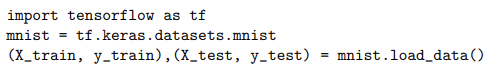

Train data set is given as $X_{train}$, test data set is given as $X_{test}$. The corresponding clusters are $y_{train}$ and $y_{test}$, i.e. digits $0, 1, . . . , 9$. Each digit is represented by a matrix $28 × 28$.

Consider the first 2000 digits from the test data. Your task is to choose the initial clusters based on the train data, then implement Lloyd’s algorithm to find accuracy for each digit and the confusion matrix.

Here is the website: https://www.tensorflow.org/datasets

#### Uncomment the cell below to run tensor flow in this notebook properly

In [1]:
#!pip install tensorflow

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
# Load the MNIST Dataset
(mnist_train_images, mnist_train_labels), (mnist_test_images, mnist_test_labels) = tf.keras.datasets.mnist.load_data()

# Checking the Dataset
print("Training data shape:", mnist_train_images.shape)
print("Training labels shape:", mnist_train_labels.shape)

Training data shape: (60000, 28, 28)
Training labels shape: (60000,)


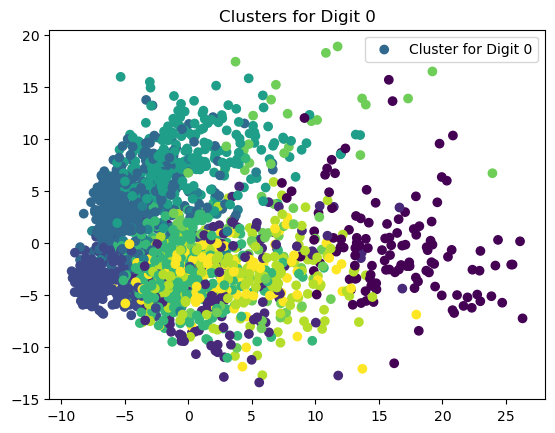

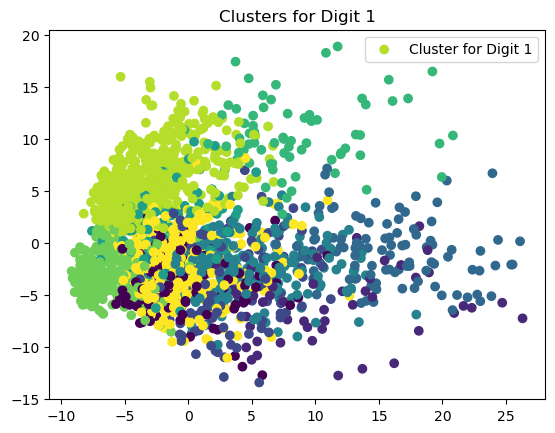

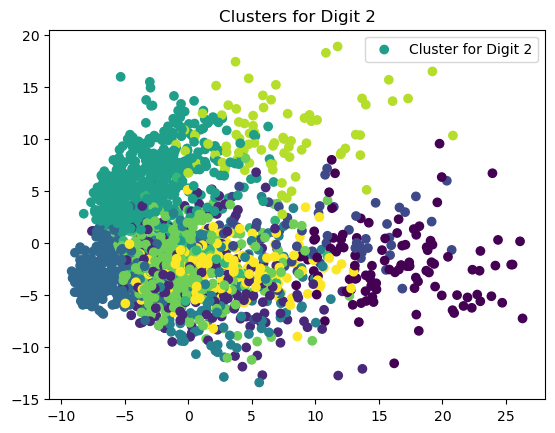

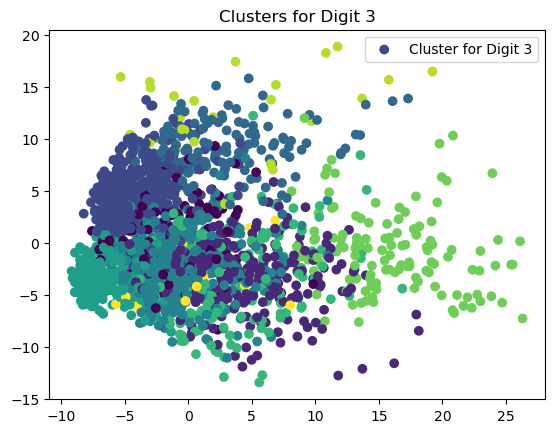

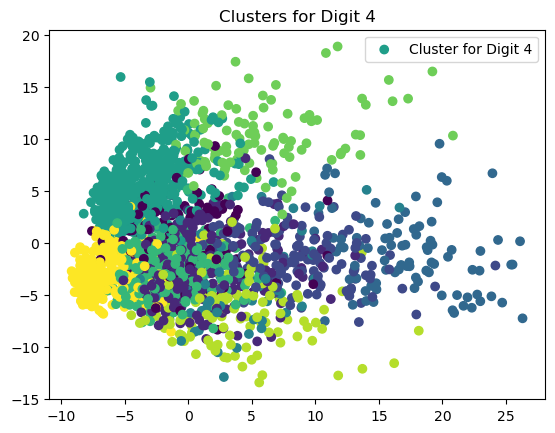

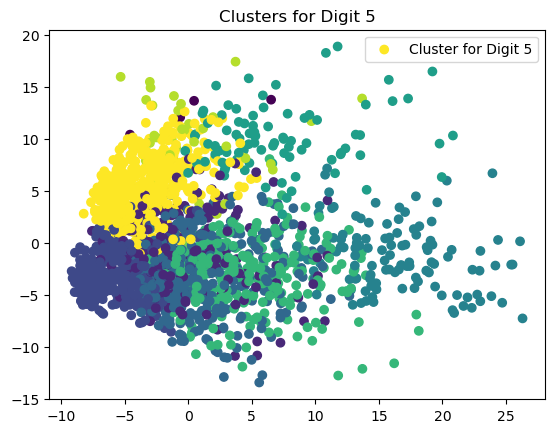

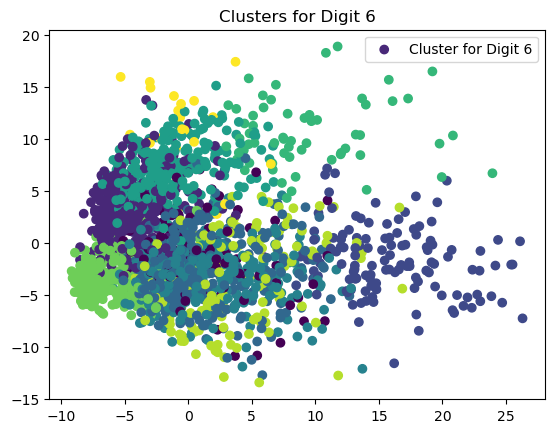

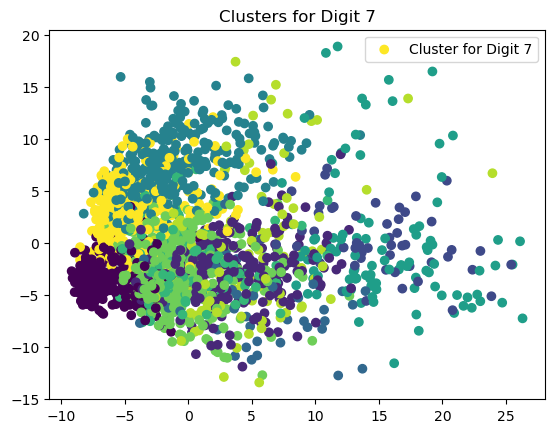

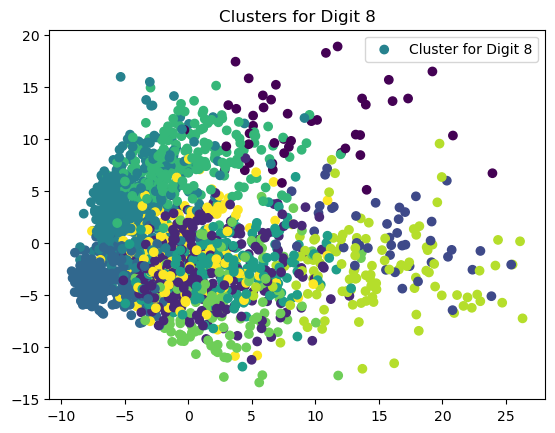

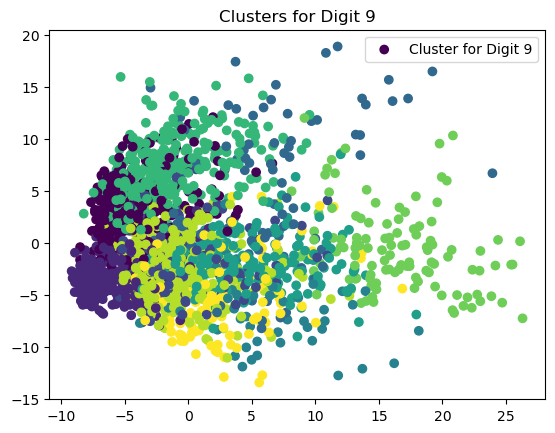

Digit 0 - Accuracy: 0.0225
Confusion Matrix for Digit 0:
[[ 44 147 317 334  45 251 325  78 156 128]
 [ 77   1   0   0   0   0   7   3  79   8]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]]

Digit 1 - Accuracy: 0.0740
Confusion Matrix for Digit 1:
[[148  48 115  98 237 107  70 142 473 328]
 [  3   0   0   0   0   1   0 229   0   1]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]]

Digit 2 - Accuracy: 0.

In [4]:
# Step 1: Initialize Clusters
def initialize_clusters(data, k):
    # Randomly select k different digits from the data
    initial_centers_indices = np.random.choice(len(data), k, replace=False)
    initial_clusters = data[initial_centers_indices]
    return initial_clusters

# Step 2: Lloyd's Algorithm for MNIST
def lloyds_algorithm(data, max_iter, tol, z):
    m = len(data) # Get the number of data points
    old_z = np.zeros(np.shape(z)) # Initialize an array for the previous cluster centers 
    iteration = 0 # Initialize the iteration counter
    cluster_ind = np.zeros(m, dtype=int) # Initialize an array to store the index of the assigned cluster

    # Continue iterating while the maximum number of iterations is not reached
    # and the relative change in cluster centers is above the tolerance
    while iteration < max_iter and np.linalg.norm(old_z - z) / np.linalg.norm(z) > tol:
        # Calculate the Euclidean distance between data points and cluster centers
        dist = np.linalg.norm(data[:, np.newaxis, :] - z, axis=2)
        
        # Assign each data point to the cluster with the closest center
        cluster_ind = np.argmin(dist, axis=1)
        old_z = np.copy(z)

        # Update cluster centers by taking the mean of assigned data points
        for j in range(len(z)):
            z[j] = np.mean(data[cluster_ind == j], axis=0)

        # Increment the iteration counter
        iteration += 1

    # Return the final cluster assignments after Lloyd's Algorithm convergence
    return cluster_ind

# Step 3: Apply Lloyd's Algorithm
k = 10  # Number of clusters (digits)

# Reshape images for clustering
flattened_test_data = mnist_test_images[:2000].reshape((2000, -1))

# Initialize dictionaries to store accuracy and confusion matrix for each digit
digit_accuracy = {}
digit_confusion_matrix = {}

# Apply feature scaling
scaler = StandardScaler()
flattened_test_data_scaled = scaler.fit_transform(flattened_test_data)

for digit in range(10):  # Iterate over each digit
    # Create binary labels for the current digit
    binary_labels = (mnist_test_labels[:2000] == digit).astype(int)

    # Initialize clusters using KMeans initialization
    initial_clusters = initialize_clusters(flattened_test_data_scaled, k)

    # Apply Lloyd's algorithm
    cluster_assignments = lloyds_algorithm(flattened_test_data_scaled, max_iter=100, tol=1e-4, z=initial_clusters)

    # Evaluate accuracy for the current digit
    accuracy = accuracy_score(binary_labels, cluster_assignments)
    digit_accuracy[digit] = accuracy

    # Compute confusion matrix for the current digit
    conf_matrix = confusion_matrix(binary_labels, cluster_assignments)
    digit_confusion_matrix[digit] = conf_matrix

    # Visualize clusters using PCA (for the first two principal components)
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(flattened_test_data_scaled)
    plt.scatter(pca_result[:, 0], pca_result[:, 1], c=cluster_assignments, cmap='viridis', label=f'Cluster for Digit {digit}')
    plt.title(f'Clusters for Digit {digit}')
    plt.legend()
    plt.show()

# Display accuracy and confusion matrix for each digit
for digit in range(10):
    print(f"Digit {digit} - Accuracy: {digit_accuracy[digit]:.4f}")
    print(f"Confusion Matrix for Digit {digit}:\n{digit_confusion_matrix[digit]}\n")